In [ ]:
#DON'T DO THIS!!!
b = pd.read_csv('bookings.csv.bz2',sep='^', nrows=9999)

In [92]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
%ll

total 1014652
-rwxrwxrwx 1 carcrupe    478407 Dec  2 13:23 06-intro_to_pandas_practical.inclass.ipynb*
-rwxrwxrwx 1 carcrupe    173167 Dec  2 13:24 10-11_Python_AmadChall_v18.pptx*
-rwxrwxrwx 1 carcrupe 554970628 Nov 25 11:57 bookings.csv.bz2*
-rwxrwxrwx 1 carcrupe     18340 Dec  9 18:33 ch_01-clase.ipynb*
-rwxrwxrwx 1 carcrupe    144634 Dec  9 18:32 ch_02-clase.ipynb*
-rwxrwxrwx 1 carcrupe      8629 Dec  2 13:25 ch_05-clase.ipynb*
-rw-rw-rw- 1 carcrupe      2400 Dec  9 18:35 ch_4.ipynb
-rwxrwxrwx 1 carcrupe 483188920 Nov 25 11:57 searches.csv.bz2*


In [9]:
!bzcat bookings.csv.bz2 | head -10000 > bookings.sample.csv


bzcat: I/O or other error, bailing out.  Possible reason follows.
bzcat: Broken pipe
	Input file = bookings.csv.bz2, output file = (stdout)


In [18]:
!bzcat searches.csv.bz2 | head -10000 > searches.sample.csv
!bzip2 searches.sample.csv


bzcat: I/O or other error, bailing out.  Possible reason follows.
bzcat: Broken pipe
	Input file = searches.csv.bz2, output file = (stdout)


In [14]:
!bzip2 bookings.sample.csv

bzip2: Can't open input file bookings.sample.csv: No such file or directory.
/bin/sh: 1: ll: not found


In [19]:
%ll

total 1015444
-rwxrwxrwx 1 carcrupe    478407 Dec  2 13:23 06-intro_to_pandas_practical.inclass.ipynb*
-rwxrwxrwx 1 carcrupe    173167 Dec  2 13:24 10-11_Python_AmadChall_v18.pptx*
-rwxrwxrwx 1 carcrupe 554970628 Nov 25 11:57 bookings.csv.bz2*
-rw-rw-rw- 1 carcrupe    535893 Dec  9 18:43 bookings.sample.csv.bz2
-rwxrwxrwx 1 carcrupe     18340 Dec  9 18:33 ch_01-clase.ipynb*
-rwxrwxrwx 1 carcrupe    144634 Dec  9 18:32 ch_02-clase.ipynb*
-rwxrwxrwx 1 carcrupe      8629 Dec  2 13:25 ch_05-clase.ipynb*
-rw-rw-rw- 1 carcrupe     12823 Dec  9 18:52 ch_4.ipynb
-rwxrwxrwx 1 carcrupe 483188920 Nov 25 11:57 searches.csv.bz2*
-rw-rw-rw- 1 carcrupe    244720 Dec  9 18:54 searches.sample.csv.bz2


In [22]:
filename_bookings='bookings.sample.csv.bz2'
filename_searches='searches.sample.csv.bz2'

b = pd.read_csv(filename_bookings, sep="^")
s = pd.read_csv(filename_searches,sep="^")

In [23]:
s.head()

,Date,Time,TxnCode,OfficeID,Country,Origin,Destination,RoundTrip,NbSegments,Seg1Departure,...,Seg6Arrival,Seg6Date,Seg6Carrier,Seg6BookingCode,From,IsPublishedForNeg,IsFromInternet,IsFromVista,TerminalID,InternetOffice
0,2013-01-01,20:25:57,MPT,624d8c3ac0b3a7ca03e3c167e0f48327,DE,TXL,AUH,1,2,TXL,...,NaN,NaN,NaN,NaN,1ASIWS,0,0,0,d41d8cd98f00b204e9800998ecf8427e,FRA
1,2013-01-01,10:15:33,MPT,b0af35b31588dc4ab06d5cf2986e8e02,MD,ATH,MIL,0,1,ATH,...,NaN,NaN,NaN,NaN,1ASIWS,0,0,0,d41d8cd98f00b204e9800998ecf8427e,KIV
2,2013-01-01,18:04:49,MPT,3561a60621de06ab1badc8ca55699ef3,US,ICT,SFO,1,2,ICT,...,NaN,NaN,NaN,NaN,1ASIWS,0,0,0,d41d8cd98f00b204e9800998ecf8427e,NYC
3,2013-01-01,17:42:40,FXP,1864e5e8013d9414150e91d26b6a558b,SE,RNB,ARN,0,1,RNB,...,NaN,NaN,NaN,NaN,1ASI,0,0,0,d41d8cd98f00b204e9800998ecf8427e,STO
4,2013-01-01,17:48:29,MPT,1ec336348f44207d2e0027dc3a68c118,NO,OSL,MAD,1,2,OSL,...,NaN,NaN,NaN,NaN,1ASIWS,0,0,0,d41d8cd98f00b204e9800998ecf8427e,OSL


Plot the monthly number of searches for flights arriving to Madrid Malaga or Barcelona

In [69]:
madrid = s[s['Destination'] == 'MAD']
malaga = s[s['Destination'] == 'MLA']
barcelona = s[s['Destination'] == 'BCN']
madrid.head()

,Date,Time,TxnCode,OfficeID,Country,Origin,Destination,RoundTrip,NbSegments,Seg1Departure,...,Seg6Arrival,Seg6Date,Seg6Carrier,Seg6BookingCode,From,IsPublishedForNeg,IsFromInternet,IsFromVista,TerminalID,InternetOffice
4,2013-01-01,17:48:29,MPT,1ec336348f44207d2e0027dc3a68c118,NO,OSL,MAD,1,2,OSL,...,NaN,NaN,NaN,NaN,1ASIWS,0,0,0,d41d8cd98f00b204e9800998ecf8427e,OSL
151,2013-01-01,10:46:21,MPT,50c54b52322080d2c257390f714f91bd,ES,FRA,MAD,0,1,FRA,...,NaN,NaN,NaN,NaN,1ASI,0,0,0,d41d8cd98f00b204e9800998ecf8427e,MAD
375,2013-01-01,09:24:45,FXA,22cf15984f4b13ed8f513a42324666d1,FR,ORY,MAD,0,3,ORY,...,NaN,NaN,NaN,NaN,1ASI,0,0,0,4e2eadd83a9320fda69759705f818867,PAR
406,2013-01-01,07:03:29,MPT,22cf15984f4b13ed8f513a42324666d1,FR,PAR,MAD,1,2,PAR,...,NaN,NaN,NaN,NaN,1ASI,0,0,0,d41d8cd98f00b204e9800998ecf8427e,PAR
509,2013-01-01,09:50:42,MPT,440642a9bdaeb6287f826cefd73255e8,US,TLV,MAD,1,2,TLV,...,NaN,NaN,NaN,NaN,1ASIWS,0,0,0,d41d8cd98f00b204e9800998ecf8427e,HPN


In [48]:
s[s['Destination'].sort_values().str.startswith('M')] #averiguar cuales empiezan por M

/home/carcrupe/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


,Date,Time,TxnCode,OfficeID,Country,Origin,Destination,RoundTrip,NbSegments,Seg1Departure,...,Seg6Arrival,Seg6Date,Seg6Carrier,Seg6BookingCode,From,IsPublishedForNeg,IsFromInternet,IsFromVista,TerminalID,InternetOffice
1,2013-01-01,10:15:33,MPT,b0af35b31588dc4ab06d5cf2986e8e02,MD,ATH,MIL,0,1,ATH,...,NaN,NaN,NaN,NaN,1ASIWS,0,0,0,d41d8cd98f00b204e9800998ecf8427e,KIV
4,2013-01-01,17:48:29,MPT,1ec336348f44207d2e0027dc3a68c118,NO,OSL,MAD,1,2,OSL,...,NaN,NaN,NaN,NaN,1ASIWS,0,0,0,d41d8cd98f00b204e9800998ecf8427e,OSL
12,2013-01-01,05:41:14,CAL,dfa4f720052cefaf2e1fe40befc016e6,HK,HKG,MXP,1,2,HKG,...,NaN,NaN,NaN,NaN,1ASIWS,0,0,0,d41d8cd98f00b204e9800998ecf8427e,HKG
39,2013-01-01,18:45:56,FFP,e69e770f8eeedd20c151538923cfb132,AT,GRZ,MUC,1,2,GRZ,...,NaN,NaN,NaN,NaN,1ASIWS,0,0,0,d41d8cd98f00b204e9800998ecf8427e,VIE
40,2013-01-01,06:36:57,FFP,86f167b84e77346849f9439ae87c02a6,SA,DMM,MNL,1,2,DMM,...,NaN,NaN,NaN,NaN,1ASIWS,0,0,0,d41d8cd98f00b204e9800998ecf8427e,JED
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9960,2013-01-10,14:15:13,AWT,739433d0c9ea99559a03f40d78d12d0e,BR,SAO,MIA,0,1,SAO,...,NaN,NaN,NaN,NaN,1ASIWS,0,0,0,d41d8cd98f00b204e9800998ecf8427e,SAO
9961,2013-01-10,11:17:55,MPT,787ebb957927bc4cb109800396906c0e,DE,CGN,MUC,1,2,CGN,...,NaN,NaN,NaN,NaN,1ASIWS,0,0,0,d41d8cd98f00b204e9800998ecf8427e,STR
9979,2013-01-10,14:25:57,MPT,3561a60621de06ab1badc8ca55699ef3,US,MIA,MLA,1,2,MIA,...,NaN,NaN,NaN,NaN,1ASIWS,0,0,0,d41d8cd98f00b204e9800998ecf8427e,NYC
9992,2013-01-10,12:05:35,MPT,6abcf3118f899e9f6fd7abe9e1167304,PT,OPO,MUC,0,1,OPO,...,NaN,NaN,NaN,NaN,1ASIWS,0,0,0,d41d8cd98f00b204e9800998ecf8427e,LIS


In [98]:
monthly_flights_madrid = madrid.groupby('Date')['Destination'].count()
monthly_flights_malaga = malaga.groupby('Date')['Destination'].count()
monthly_flights_barcelona = barcelona.groupby('Date')['Destination'].count()

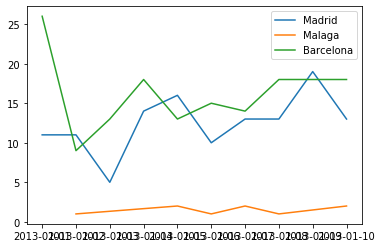

In [103]:
plt.plot(monthly_flights_madrid.index.values,monthly_flights_madrid)
plt.plot(monthly_flights_malaga.index.values,monthly_flights_malaga)
plt.plot(monthly_flights_barcelona.index.values,monthly_flights_barcelona)
plt.legend(['Madrid','Malaga', 'Barcelona']);